# 1. Big Exercise

**The goal of this exercise is aimed to get to know the general strategy to solve NLP sentiment analysis problem**

In [1]:
## Import all the packages we might use

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys
import os
import gensim
import pandas as pd
import re

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/charliedang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Data preparation

In [3]:
os.getcwd()

'/Users/charliedang/Documents/Deep_learning'

In [4]:
## Data set: Yelp review

path = "../MLtext2/data/yelp.csv"
df = pd.read_csv(path)
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


For simplify our task, here, we don't want to get deeper in all the columns, we will treat text as X, and stars as Y. The problem will be a multiclass classification problem

In [5]:
df = df[['text','stars']]
df.head()

,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
2,love the gyro plate. Rice is so good and I als...,4
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,General Manager Scott Petello is a good egg!!!...,5


In [6]:
# seperate the target and the input

X = df['text']
Y = df['stars']

In [7]:
## some information about df

df.shape

(10000, 2)

In [8]:
Y.value_counts().sort_index()

1     749
2     927
3    1461
4    3526
5    3337
Name: stars, dtype: int64

## 2. An exercise of nltk and gensim

### 2.1 Gensim: Data is from gensim online tutorial

In [13]:
from gensim import corpora
from gensim.models import Word2Vec
from pprint import pprint

In [12]:
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

In [24]:
# Exercise 1. remove stop words in the documents

stopwords = 'for a of the and to in'
stoplist = set(stopwords.split())

pprint(stoplist)


texts = [[word for word in text.lower().split() if word not in stoplist] for text in documents]
pprint(texts)

{'a', 'in', 'the', 'of', 'to', 'for', 'and'}
[['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'],
 ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'management', 'system'],
 ['system', 'human', 'system', 'engineering', 'testing', 'eps'],
 ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'],
 ['generation', 'random', 'binary', 'unordered', 'trees'],
 ['intersection', 'graph', 'paths', 'trees'],
 ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'],
 ['graph', 'minors', 'survey']]


In [25]:
## Exercise 2. Based on the previous result, remove the super infrequent words from the documents, which the infrequent
## words means it appears only once in the documnts.

frequency = {}
for t in texts:
    for w in t:
        if (w in frequency):
            frequency[w] += 1
        else:
            frequency[w] = 1

# pprint (frequency)

texts = [[word for word in text if frequency[word] > 1] for text in texts]
pprint (texts)

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]


In [26]:
## Bag of word!

dictionary = corpora.Dictionary(texts)
print (dictionary)

Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...)


In [29]:
dictionary.token2id

{'computer': 0,
 'eps': 8,
 'graph': 10,
 'human': 1,
 'interface': 2,
 'minors': 11,
 'response': 3,
 'survey': 4,
 'system': 5,
 'time': 6,
 'trees': 9,
 'user': 7}

In [48]:
new_text = "human, human time computer"
pattern = re.compile(r",\s{1}|\s")
pattern.split(new_text)

new_vec = dictionary.doc2bow(pattern.split(new_text))
pprint (new_vec)

[(0, 1), (1, 2), (6, 1)]


In [51]:
## Word2vec model

from gensim.models import Word2Vec

model = Word2Vec(texts, min_count=1)
print (model)

Word2Vec(vocab=12, size=100, alpha=0.025)


In [54]:
words= list(model.wv.vocab)
print (words)

['human', 'interface', 'computer', 'survey', 'user', 'system', 'response', 'time', 'eps', 'trees', 'graph', 'minors']


In [57]:
print (model['interface'])

[ -2.74623325e-03  -2.84683076e-03   1.18792208e-03   5.36332838e-04
   3.91214946e-03   9.58148274e-04  -2.51021679e-03  -2.05886713e-03
   9.41008693e-05   3.61978216e-03  -6.32701500e-04   3.21979052e-03
  -3.11214593e-03  -3.67149618e-03   4.69203154e-03  -2.34485371e-03
  -2.38188938e-03   3.41704651e-03   4.23556846e-03  -3.04797734e-03
  -3.37033253e-03  -3.32340691e-03  -3.15379375e-03  -1.38774770e-03
  -2.06780527e-03  -3.90869303e-04   2.51338352e-03   2.42015836e-03
  -4.56590089e-04   3.94087343e-04   4.96380730e-04   1.16624963e-03
  -3.43338680e-03   4.65928763e-03   4.24091192e-03   3.45237483e-03
   7.46426638e-04  -8.99409875e-04  -4.31795415e-05  -1.80895790e-03
  -1.02180254e-03  -2.35309754e-03  -3.44958249e-03   8.29339435e-04
  -2.11674022e-03   4.89357207e-03  -3.20594059e-03   3.33735673e-03
  -3.55555938e-04   1.97055284e-03  -3.84254241e-03  -2.54040863e-03
  -3.20303557e-03   1.02196669e-03   5.60581451e-04  -3.34883179e-03
   2.47196457e-03  -1.03197899e-03

/Users/charliedang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


/Users/charliedang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


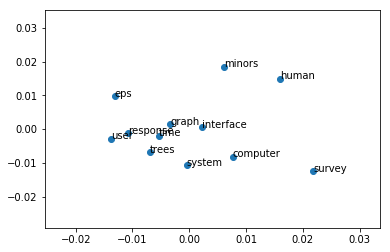

In [64]:
## The PCA and t-SNE plot

## 1. PCA
from sklearn.decomposition import PCA

X_train = model[model.wv.vocab]

pca= PCA(n_components=2)
x_deco = pca.fit_transform(X_train)

plt.scatter(x_deco[:,0], x_deco[:,1])

words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy = (x_deco[i,0], x_deco[i,1]))
    
plt.show()

/Users/charliedang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


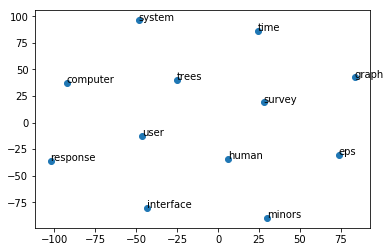

In [66]:
from sklearn.manifold import TSNE

X_train = model[model.wv.vocab]

X_embedded = TSNE(n_components=2).fit_transform(X_train)

plt.scatter(X_embedded[:,0], X_embedded[:,1])

words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy = (X_embedded[i,0], X_embedded[i,1]))
    
plt.show()

In [68]:
print (model.similarity('system', 'computer'))
print (model.similarity('human', 'computer'))
print (model.similarity('system','human'))

-0.0119294414864
0.0771816634299
-0.185046336489


/Users/charliedang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/Users/charliedang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/Users/charliedang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
